<a href="https://colab.research.google.com/github/nagapurisatwika/Task-7-Support-Vector-Machines-SVM-./blob/main/Task_7_Support_Vector_Machines_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Step 2: Load Dataset
data = load_breast_cancer()
X = data.data
y = data.target
print(f"Shape of X: {X.shape}, y: {y.shape}")

Shape of X: (569, 30), y: (569,)


In [3]:
# Step 3: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [5]:
# Step 5: SVM with Linear Kernel
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

print("🔹 Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))
print("🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))


🔹 Linear Kernel Accuracy: 0.956140350877193
🔹 Confusion Matrix:
 [[41  2]
 [ 3 68]]


In [6]:
# Step 6: SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print("\n🔹 RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))



🔹 RBF Kernel Accuracy: 0.9736842105263158
🔹 Confusion Matrix:
 [[41  2]
 [ 1 70]]


In [7]:
# Step 7: Hyperparameter Tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0, cv=5)
grid.fit(X_train, y_train)

print("\n🔍 Best Params:", grid.best_params_)
print("✅ Best Estimator Accuracy:", grid.score(X_test, y_test))


🔍 Best Params: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
✅ Best Estimator Accuracy: 0.9824561403508771


In [8]:
# Step 8: Cross-validation score
cv_scores = cross_val_score(grid.best_estimator_, X_scaled, y, cv=5)
print("\n📈 Cross-validation scores:", cv_scores)
print("📊 Mean CV Accuracy:", np.mean(cv_scores))


📈 Cross-validation scores: [0.97368421 0.97368421 0.98245614 0.97368421 0.99115044]
📊 Mean CV Accuracy: 0.9789318428815401


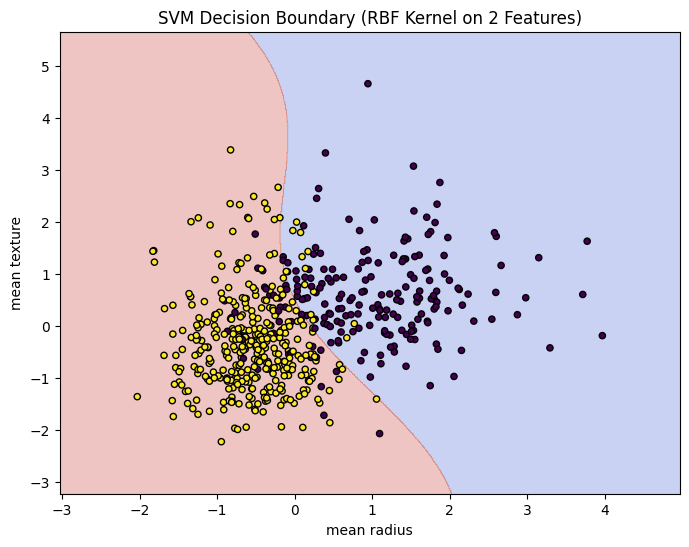

In [9]:
# Step 9: Visualization (Using 2 features only for plot)
# Let's use first two features for 2D visualization
X_vis = X_scaled[:, :2]
X_vis_train, X_vis_test, y_vis_train, y_vis_test = train_test_split(X_vis, y, test_size=0.2, random_state=42)

svm_vis = SVC(kernel='rbf', C=1, gamma=0.1)
svm_vis.fit(X_vis_train, y_vis_train)

# Create mesh grid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, s=20, edgecolors='k')
plt.title("SVM Decision Boundary (RBF Kernel on 2 Features)")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.show()
